In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("debasisdotcom/parkinson-disease-detection")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/debasisdotcom/parkinson-disease-detection/versions/2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv(path+'/Parkinsson disease.csv')

In [ ]:
# EDA
# Display the first few rows of the dataset
print("head: \n",data.head())
# Display total numbers of row and comlumns
print("shape: \n",data.shape)
# Display name of the columns
print("columns: \n",data.columns)
# Check for missing values
print("Sum of null values:\n",data.isnull().sum())
#check the data types
print("data types:\n",data.dtypes)

# Statistical summary
print("statistical summary:\n",data.describe())

head: 
              name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0    

In [ ]:
# Data Cleaning
data.dropna(inplace=True)  # Drop missing values
data.drop(columns=["name"],inplace=True)

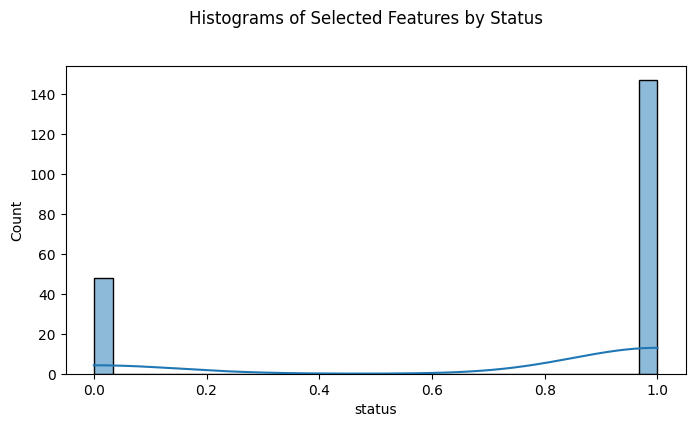

In [ ]:
# DATA VISUALIZATION
# Histogram for specific features
features_to_plot = ['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'DFA', 'spread1', 'D2']
# Create a figure with subplots for each feature
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x="status",  kde=True, bins=30)
plt.suptitle('Histograms of Selected Features by Status', y=1.02)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

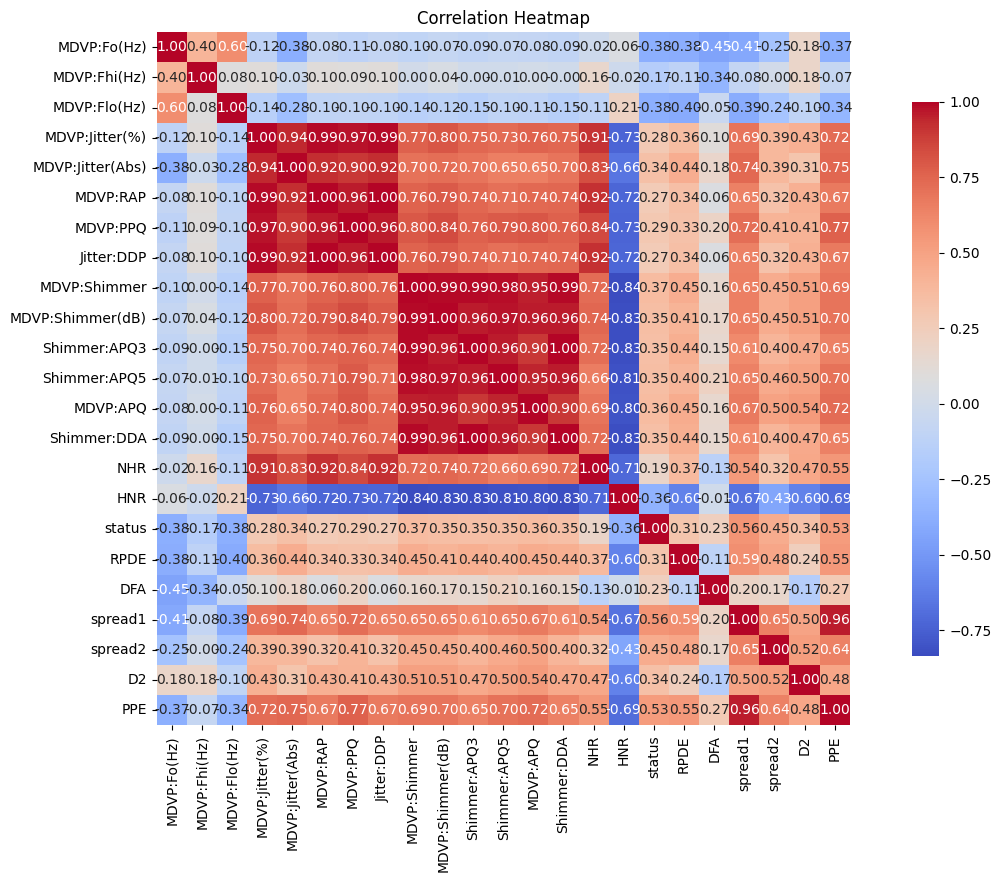

In [ ]:
#Heat map
plt.figure(figsize=(16, 9))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')

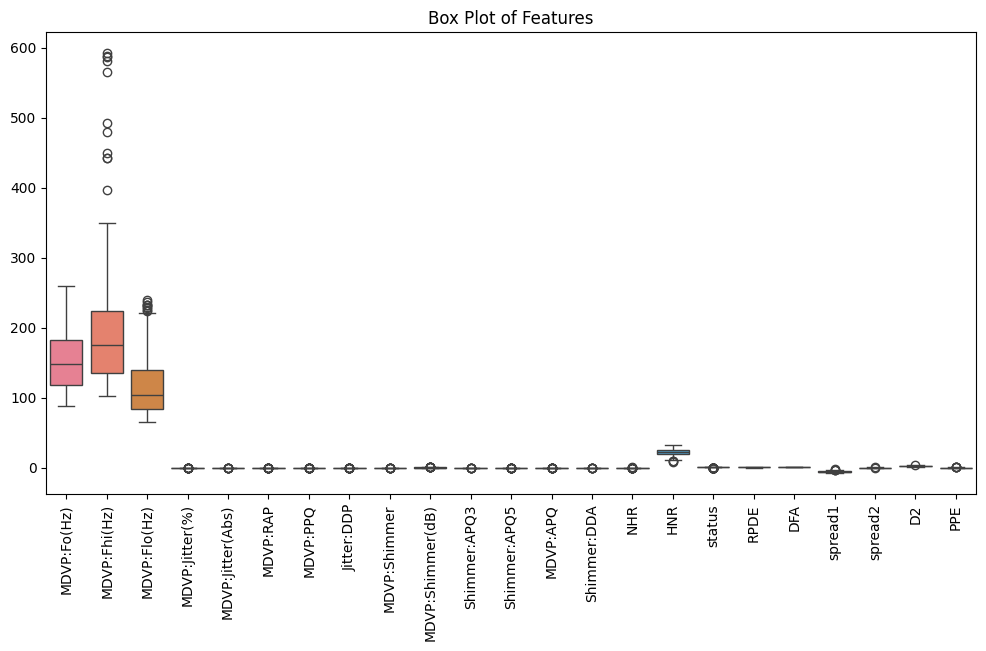

In [ ]:

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

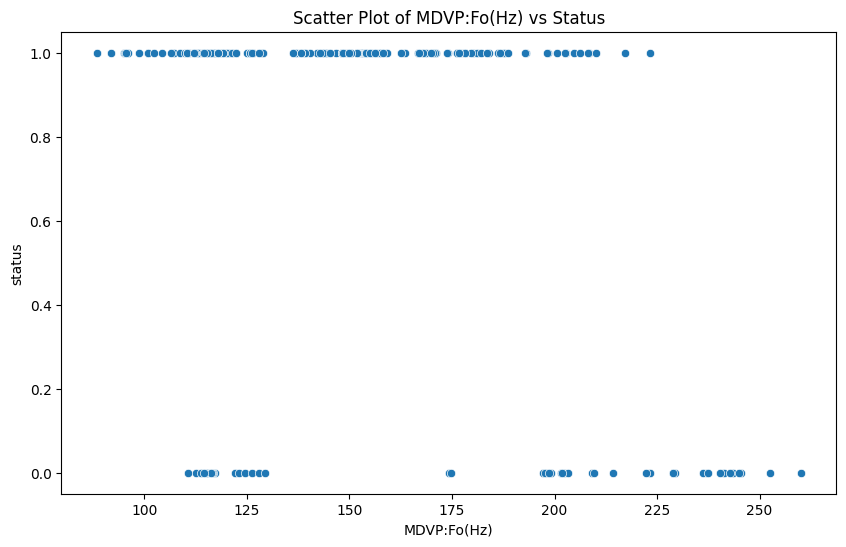

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MDVP:Fo(Hz)', y='status', data=data)  # Example feature
plt.title('Scatter Plot of MDVP:Fo(Hz) vs Status')
plt.show()

In [ ]:
# Define features and target
X = data.drop(['status'], axis=1).values  # Features
y = data['status'].values  # Target

In [ ]:
# Logistic Regression from Scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0

    for _ in range(num_iterations):
        linear_model = np.dot(X, weights) + bias  # Assuming X and weights are NumPy arrays
        y_predicted = sigmoid(linear_model)

        # Gradient Descent
        dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / num_samples) * np.sum(y_predicted - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

def predict_logistic(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_predicted]

In [ ]:
# Train-test split
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X[train_indices], X[test_indices]
X_train = np.array(X_train)  # Ensure X_train is a NumPy array
y_train, y_test = y[train_indices], y[test_indices]

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train Logistic Regression
weights, bias = logistic_regression(X_train, y_train)
weights

array([-0.27889396, -0.14995615, -0.29841814, -0.05420259, -0.01174935,
       -0.00053807, -0.0595059 , -0.00055571,  0.0799778 ,  0.05030585,
        0.05419988,  0.04204815,  0.12238288,  0.05416634, -0.16396776,
       -0.11747683,  0.0534617 ,  0.16406606,  0.41283206,  0.3474774 ,
        0.33435224,  0.30407946])

In [ ]:
# Predictions
logistic_predictions = predict_logistic(X_test, weights, bias)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

In [ ]:
logistic_accuracy = accuracy(y_test, logistic_predictions)
logistic_precision = precision(y_test, logistic_predictions)
logistic_recall = recall(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)

In [ ]:
# Evaluate performance for KNN
knn_accuracy = accuracy(y_test, knn_predictions)
knn_precision = precision(y_test, knn_predictions)
knn_recall = recall(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

In [ ]:
rf_accuracy = accuracy(y_test, rf_predictions)
rf_precision = precision(y_test, rf_predictions)
rf_recall = recall(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

In [ ]:
# Print the results
print("Logistic Regression Performance:")
print(f"Accuracy: {logistic_accuracy:.2f}, Precision: {logistic_precision:.2f}, Recall: {logistic_recall:.2f}, F1 Score: {logistic_f1:.2f}")

# Print the results for KNN
print("K-Nearest Neighbors Performance:")
print(f"Accuracy: {knn_accuracy:.2f}, Precision: {knn_precision:.2f}, Recall: {knn_recall:.2f}, F1 Score: {knn_f1:.2f}")

print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {rf_accuracy:.2f}, Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}, F1 Score: {rf_f1:.2f}")

Logistic Regression Performance:
Accuracy: 0.77, Precision: 0.00, Recall: 0.00, F1 Score: 0.00
K-Nearest Neighbors Performance:
Accuracy: 0.87, Precision: 0.86, Recall: 1.00, F1 Score: 0.92

Random Forest Classifier Performance:
Accuracy: 0.85, Precision: 0.83, Recall: 1.00, F1 Score: 0.91


In [ ]:
# Create a DataFrame to compare the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [logistic_accuracy, logistic_precision, logistic_recall, logistic_f1],
    'K-Nearest Neighbors': [knn_accuracy, knn_precision, knn_recall, knn_f1],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1]
})

# Set the Metric column as the index
results.set_index('Metric', inplace=True)

# Print the comparison table
print(results)
# Determine the best model based on each metric
best_models = results.idxmax(axis=1)
best_scores = results.max(axis=1)

# Print the best model for each metric
print("\nBest Model for Each Metric:")
for metric, model in best_models.items():
    print(f"{metric}: {model} with a score of {best_scores[metric]:.2f}")


           Logistic Regression  K-Nearest Neighbors  Random Forest
Metric                                                            
Accuracy              0.769231             0.871795       0.846154
Precision             0.000000             0.857143       0.833333
Recall                0.000000             1.000000       1.000000
F1 Score              0.000000             0.923077       0.909091

Best Model for Each Metric:
Accuracy: K-Nearest Neighbors with a score of 0.87
Precision: K-Nearest Neighbors with a score of 0.86
Recall: K-Nearest Neighbors with a score of 1.00
F1 Score: K-Nearest Neighbors with a score of 0.92


In [ ]:
#HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter tuning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Best parameters for KNN
best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_

In [ ]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Best parameters for Random Forest
best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

In [ ]:
print("Best Hyperparameters for K-Nearest Neighbors:")
print(best_knn_params)
print(f"Best Cross-Validation Score: {best_knn_score:.2f}")

print("\nBest Hyperparameters for Random Forest Classifier:")
print(best_rf_params)
print(f"Best Cross-Validation Score: {best_rf_score:.2f}")

Best Hyperparameters for K-Nearest Neighbors:
{'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Score: 0.92

Best Hyperparameters for Random Forest Classifier:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.91


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)  # Use f_classif for classification
X_new = selector.fit_transform(X_train, y_train)


In [ ]:
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = data.columns[selected_indices]

print("Selected Features using Univariate Feature Selection (ANOVA F-value):")


Selected Features using Univariate Feature Selection (ANOVA F-value):


In [ ]:
# Step 2: Recursive Feature Elimination (RFE)
rf_model = RandomForestClassifier(n_estimators=100)
rfe = RFE(estimator=rf_model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)


RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [ ]:
# Get the selected features
rfe_selected_features = data.columns[:-1][rfe.support_]

print("\nSelected Features using Recursive Feature Elimination (RFE):")
print(rfe_selected_features)


Selected Features using Recursive Feature Elimination (RFE):
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'Jitter:DDP', 'MDVP:APQ',
       'NHR', 'status', 'DFA', 'spread1', 'D2'],
      dtype='object')


In [ ]:
# Step 3: Feature Importance from Tree-based Models
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_


In [ ]:
# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': data.columns[:-1], 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Select the top k features
top_k = 5
top_features = feature_importance_df.head(top_k)

print("\nTop Features based on Feature Importance from Random Forest:")
print(top_features)


Top Features based on Feature Importance from Random Forest:
             Feature  Importance
18               DFA    0.150487
21                D2    0.105869
0        MDVP:Fo(Hz)    0.075695
14               NHR    0.062379
4   MDVP:Jitter(Abs)    0.058811


In [ ]:
# Convert selected features to a list
selected_features_list = selected_features.tolist()
# Filter the training and test sets to include only the selected features
# Use the indices from SelectKBest to filter the features
X_train_selected = X_train[:, selected_indices]  # Use the indices from SelectKBest
X_test_selected = X_test[:, selected_indices]

In [ ]:
# Rebuild the KNN model with optimal hyperparameters
knn_model_final = KNeighborsClassifier(**best_knn_params)
knn_model_final.fit(X_train_selected, y_train)

# Predictions and evaluation for KNN
knn_final_predictions = knn_model_final.predict(X_test_selected)

# Evaluate performance
knn_final_accuracy = accuracy(y_test, knn_final_predictions)
knn_final_precision = precision(y_test, knn_final_predictions)
knn_final_recall = recall(y_test, knn_final_predictions)
knn_final_f1 = f1_score(y_test, knn_final_predictions)

In [ ]:
# Rebuild the Random Forest model with optimal hyperparameters
rf_model_final = RandomForestClassifier(**best_rf_params)
rf_model_final.fit(X_train_selected, y_train)

# Predictions and evaluation for Random Forest
rf_final_predictions = rf_model_final.predict(X_test_selected)

# Evaluate performance
rf_final_accuracy = accuracy(y_test, rf_final_predictions)
rf_final_precision = precision(y_test, rf_final_predictions)
rf_final_recall = recall(y_test, rf_final_predictions)
rf_final_f1 = f1_score(y_test, rf_final_predictions)


In [ ]:
# Print the final results for KNN
print("Final K-Nearest Neighbors Performance:")
print(f"Accuracy: {knn_final_accuracy:.2f}, Precision: {knn_final_precision:.2f}, Recall: {knn_final_recall:.2f}, F1 Score: {knn_final_f1:.2f}")

print("\nFinal Random Forest Classifier Performance:")
print(f"Accuracy: {rf_final_accuracy:.2f}, Precision: {rf_final_precision:.2f}, Recall: {rf_final_recall:.2f}, F1 Score: {rf_final_f1:.2f}")

Final K-Nearest Neighbors Performance:
Accuracy: 0.82, Precision: 0.87, Recall: 0.90, F1 Score: 0.89

Final Random Forest Classifier Performance:
Accuracy: 0.87, Precision: 0.86, Recall: 1.00, F1 Score: 0.92


In [ ]:

# Create a DataFrame to compare the performance of KNN and Random Forest
performance_data = {
    'Model': ['K-Nearest Neighbors', 'Random Forest'],
    'Accuracy': [knn_final_accuracy, rf_final_accuracy],
    'Precision': [knn_final_precision, rf_final_precision],
    'Recall': [knn_final_recall, rf_final_recall],
    'F1 Score': [knn_final_f1, rf_final_f1]
}

performance_df = pd.DataFrame(performance_data)

# Print the comparison table
print("\nComparison of Final Model Performance:")
print(performance_df)

# Determine which model is better based on F1 Score
if knn_final_f1 > rf_final_f1:
    better_model = "K-Nearest Neighbors"
    better_score = knn_final_f1
else:
    better_model = "Random Forest"
    better_score = rf_final_f1

# Print the comparison statement
print(f"\nBased on the F1 Score, the better model is: {better_model} with an F1 Score of {better_score:.2f}.")


Comparison of Final Model Performance:
                 Model  Accuracy  Precision  Recall  F1 Score
0  K-Nearest Neighbors  0.820513   0.870968     0.9  0.885246
1        Random Forest  0.871795   0.857143     1.0  0.923077

Based on the F1 Score, the better model is: Random Forest with an F1 Score of 0.92.



Confusion Matrix for K-Nearest Neighbors:
[[ 5  4]
 [ 3 27]]


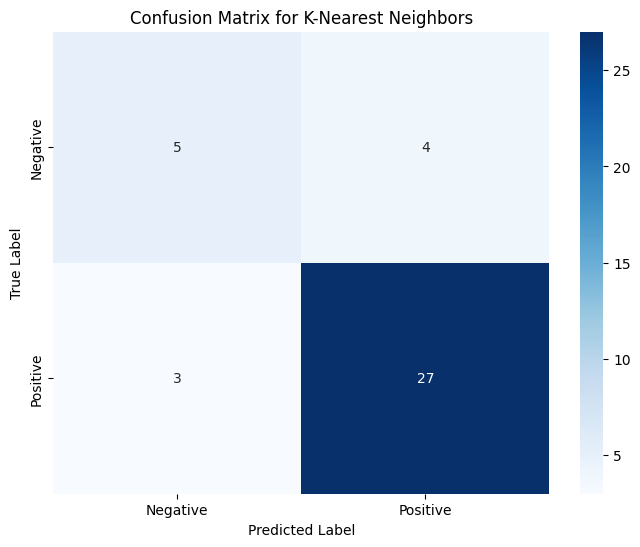


Confusion Matrix for Random Forest Classifier:
[[ 4  5]
 [ 0 30]]


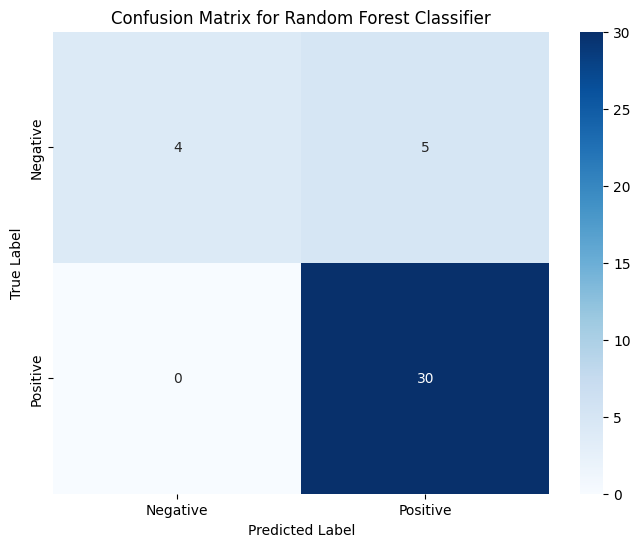

In [ ]:

from sklearn.metrics import confusion_matrix
# Confusion Matrix for KNN
knn_confusion_matrix = confusion_matrix(y_test, knn_final_predictions)
print("\nConfusion Matrix for K-Nearest Neighbors:")
print(knn_confusion_matrix)

# Heatmap for KNN Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Random Forest
rf_confusion_matrix = confusion_matrix(y_test, rf_final_predictions)
print("\nConfusion Matrix for Random Forest Classifier:")
print(rf_confusion_matrix)

# Heatmap for Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Logistic Regression AUC: 0.87
K-Nearest Neighbors AUC: 0.93
Random Forest Classifier AUC: 0.94


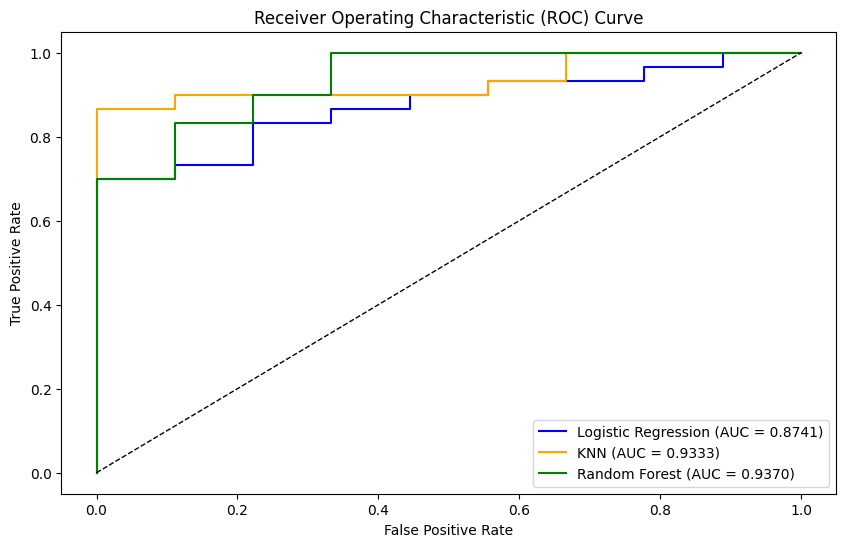

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predictions for ROC curve
logistic_probabilities = sigmoid(np.dot(X_test, weights) + bias)  # Get probabilities for logistic regression
# Predictions for ROC curve for KNN
knn_probabilities = knn_model_final.predict_proba(X_test_selected)[:, 1]  # Get probabilities for KNN
rf_probabilities = rf_model_final.predict_proba(X_test_selected)[:, 1]  # Get probabilities for Random Forest

# Calculate ROC curve and AUC for Logistic Regression
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probabilities)
logistic_auc = auc(logistic_fpr, logistic_tpr)



# Calculate ROC curve and AUC for KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probabilities)
knn_auc = auc(knn_fpr, knn_tpr)


# Calculate ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
rf_auc = auc(rf_fpr, rf_tpr)

# Print AUC scores
print(f"Logistic Regression AUC: {logistic_auc:.2f}")
# Print AUC score for KNN
print(f"K-Nearest Neighbors AUC: {knn_auc:.2f}")
print(f"Random Forest Classifier AUC: {rf_auc:.2f}")

# Plotting ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(logistic_fpr, logistic_tpr, color='blue', label=f'Logistic Regression (AUC = {logistic_auc:.4f})')
plt.plot(knn_fpr, knn_tpr, color='orange', label=f'KNN (AUC = {knn_auc:.4f})')
plt.plot(rf_fpr, rf_tpr, color='green', label=f'Random Forest (AUC = {rf_auc:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=1)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()